<a href="https://colab.research.google.com/github/GeeK1224/cau_ml_project/blob/main/cau_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Project Team ATES(отец)
This is our implementation of `CAU | ML Challenge | Final 2023`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# Colors
hex_color1 = '#616161'
hex_color2 = '#F2B327'
hex_color3 = '#000000'

In [3]:
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_test_features_public.csv
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_train_data_public.csv
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/sample_submission.csv

--2023-12-21 18:01:08--  https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_test_features_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216168 (211K) [text/plain]
Saving to: ‘kaggle_test_features_public.csv’

kaggle_test_feature 100%[===================>] 211.10K  --.-KB/s    in 0.02s   

2023-12-21 18:01:08 (12.2 MB/s) - ‘kaggle_test_features_public.csv’ saved [216168/216168]

--2023-12-21 18:01:08--  https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_train_data_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request 

## Step 1: Data Analysis

In [4]:
test_data = pd.read_csv("kaggle_test_features_public.csv")
train_data = pd.read_csv("kaggle_train_data_public.csv")
sample = pd.read_csv("sample_submission.csv")

In [5]:
train_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Score,Churn Value,CLTV
count,3944.0,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000,3944.000000
mean,1.0,93504.840517,36.282735,-119.811722,32.413540,64.631415,58.683824,0.264959,4392.830122
std,0.0,1868.032274,2.460654,2.140234,24.556004,29.991988,21.497163,0.441368,1181.398114
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.400000,5.000000,0.000000,2003.000000
25%,1.0,92077.250000,34.037319,-121.806872,9.000000,35.637500,41.000000,0.000000,3468.750000
50%,1.0,93550.500000,36.375590,-119.687964,29.000000,70.250000,61.000000,0.000000,4505.000000
75%,1.0,95337.250000,38.158676,-118.057091,55.000000,89.750000,75.000000,1.000000,5374.750000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.650000,100.000000,1.000000,6500.000000


In [6]:
# walking through unique values

columns = train_data.columns.values
for column in columns:
  print(f"{column} - {train_data[column].unique()}")

CustomerID - ['7964-VEXDG' '5141-ZUVBH' '7718-UPSKJ' ... '0887-HJGAR' '3537-RYBHH'
 '8383-SGHJU']
Count - [1]
Country - ['United States']
State - ['California']
City - ['Anaheim' 'Boron' 'San Diego' ... 'Petrolia' 'Fallbrook' 'Highland']
Zip Code - [92802 93516 92116 ... 94110 93103 93307]
Lat Long - ['33.807864, -117.923782' '34.95703, -117.73045' '32.765299, -117.122565'
 ... '37.750021, -122.415201' '34.438581, -119.685368'
 '35.280113, -118.962329']
Latitude - [33.807864 34.95703  32.765299 ... 37.750021 34.438581 35.280113]
Longitude - [-117.923782 -117.73045  -117.122565 ... -122.415201 -119.685368
 -118.962329]
Gender - ['Male' 'Female']
Senior Citizen - ['No' 'Yes']
Partner - ['No' 'Yes']
Dependents - ['Yes' 'No']
Tenure Months - [21  9 69  5 18 56 30 63 14 46  4 68  0  7 48  3 71  8 40 67 28 72 41 19
  1 13 49 36 50 65 55  2 45 24 66 70 53 15 52 64  6 38 44 10 60 62 11 12
 31 20 26 25 33 23 58 59 34 35 43 27 17 22 32 47 51 61 57 42 39 16 29 37
 54]
Phone Service - ['Yes' 'No']

## Data Classification
Here we classified columns according to their usability and overall importance based only on common sense.

Classes:
1. 🟥 unusable
2. 🟩 usable
3. 🟪 questionable | presentation purposes

| Column name | Status | Reason |
| --- | --- | --- |
| CustomerID | 🟩 | Just to distinguish users |
| Count | 🟥 | Only one value equal to 1 |
| Country | 🟥 | U.S.A. only |
| State | 🟥 | California only |
| City | 🟥 | There was interesting case of Zenia (outlier) city with 60 churns, but it is still hard to make decision |
| Zip Code | 🟥 | a useless value that will throw off the weights |
| Lat Long | 🟥 | a useless value that will throw off the weights |
| Latitude | 🟥 | a useless value that will throw off the weights |
| Longitude | 🟥 | a useless value that will throw off the weights |
| Gender | 🟩 | Categorical data, contains useful information |
| Senior Citizen | 🟩 | Categorical data, contains useful information |
| Partner | 🟩 | Categorical data, contains useful information |
| Dependents | 🟩 | Categorical data, contains useful information |
| Tenure Months | 🟩 | Contains useful information, very important |
| Phone Service | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Multiple Lines | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Internet Service | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Online Security | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Online Backup | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Device Protection | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Tech Support | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Streaming TV | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Streaming Movies | 🟩 | In general, it’s difficult to say anything based on the lower values. |
| Contract | 🟩 | Categorical data, contains useful information, very useful |
| Paperless Billing | 🟥 | Not useful because the value can be obtained from another more informative column |
| Payment Method | 🟪 | questionable |
| Monthly Charges | 🟪 | questionable |
| Churn Score | 🟪 |  questionable |
| Churn Value | 🟩 |  Contain useful data |
| CLTV | 🟪 |  quetionable |
| Churn Reason | 🟪 | Well, I don’t know, when canceling a subscription or deleting a program, companies often ask you to leave a feedback, maybe you can classify problems under general cases and push the values |

In [73]:
gender_labels = ['males', 'females']

males = train_data[train_data["Gender"] == "Male"]
females = train_data[train_data["Gender"] == "Female"]

churn_male = males[males['Churn Value'] == 1]['Count']
churn_female = females[females['Churn Value'] == 1]['Count']

ratio_males = churn_male.count() / males['Count'].count()
ratio_females = churn_female.count() / females['Count'].count()

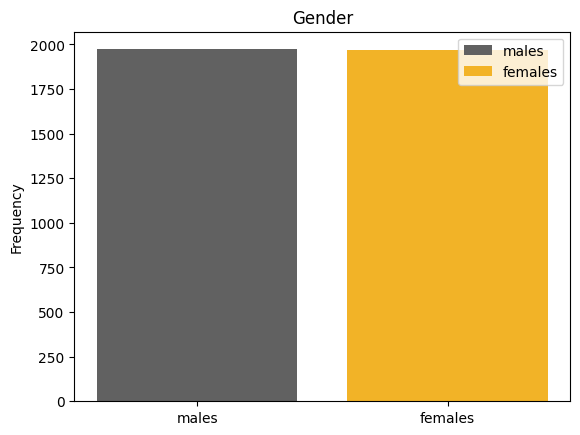

In [74]:
plt.bar(gender_labels, [males['Count'].count(), females['Count'].count()], label=gender_labels, color=[hex_color1, hex_color2])
plt.title('Gender')
plt.ylabel('Frequency')
plt.legend()
plt.show()

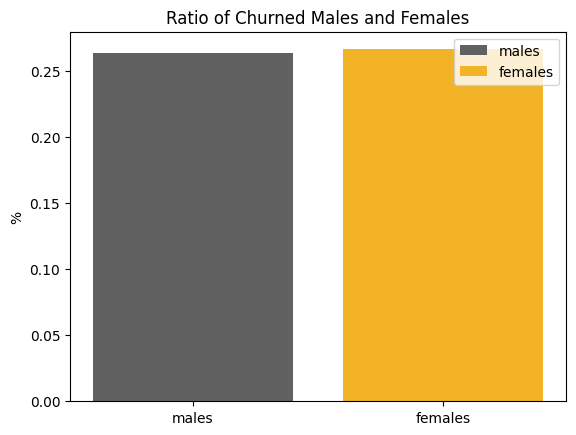

In [75]:
plt.bar(gender_labels, [ratio_males, ratio_females], label=gender_labels, color=[hex_color1, hex_color2])
plt.title('Ratio of Churned Males and Females')
plt.ylabel('%')
plt.legend()
plt.show()

In [76]:
cities = train_data["City"].unique()

len(cities)

1102

In [77]:
train_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [78]:
score_data = train_data[train_data["Churn Value"] == 1]['Churn Score']
reason_data = train_data[train_data["Churn Value"] == 1]['Churn Reason']
score_reason_data = pd.concat([score_data, reason_data], axis=1)
reasons = score_reason_data['Churn Reason'].unique()

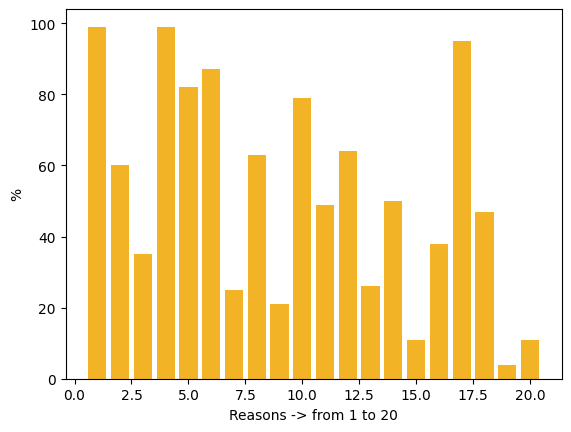

In [79]:
number_reasons = []

for reason in reasons:
  reason_occurences = len(reason_data[reason_data == reason])
  number_reasons.append(reason_occurences)

plt.bar(range(1, 21), number_reasons, color=hex_color2)
plt.ylabel('%')
plt.xlabel('Reasons -> from 1 to 20')
plt.show()

#### Reasons that lead to churn
1. Competitor offered more data ~ 10.0%
2. Product dissatisfaction ~ 6.0%
3. Moved ~ 4.0%
4. Attitude of support person ~ 10.0%
5. Don't know ~ 8.0%
6. Competitor made better offer ~ 9.0%
7. Limited range of services ~ 3.0%
8. Network reliability ~ 7.0%
9. Long distance charges ~ 3.0%
10. Attitude of service provider ~ 8.0%
11. Lack of self-service on Website ~ 5.0%
12. Competitor had better devices ~ 7.0%
13. Lack of affordable download/upload speed ~ 3.0%
14. Price too high ~ 5.0%
15. Poor expertise of phone support ~ 2.0%
16. Extra data charges ~ 4.0%
17. Competitor offered higher download speeds ~ 10.0%
18. Service dissatisfaction ~ 5.0%
19. Deceased ~ 1.0%
20. Poor expertise of online support ~ 2.0%

In [80]:
cities_count = []

cities = train_data['City'].unique()
city_churn = train_data[train_data["Churn Value"] == 1]['City']

for city in cities:
  city_count = len(city_churn[city_churn == city])
  cities_count.append(city_count)

cities_count = pd.Series(cities_count)
cities = pd.Series(cities)
cities_values = pd.concat([cities, cities_count], axis=1)
cities_values.min()

0    Acampo
1         0
dtype: object

From this code partiton we found that Zenia city is an outlier with 60 churns.

In [81]:
age_labels = ['young', 'senior']

seniors = train_data[train_data['Senior Citizen'] == 'Yes']
youngs = train_data[train_data['Senior Citizen'] == 'No']

churn_seniors = seniors[seniors['Churn Value'] == 1]['Count']
churn_youngs = youngs[youngs['Churn Value'] == 1]['Count']

ratio_seniors = churn_seniors.count() / seniors['Count'].count()
ratio_youngs = churn_youngs.count() / youngs['Count'].count()
print(ratio_seniors, ratio_youngs)

0.4071207430340557 0.23711340206185566


From the total number of the elderly population, it is clear that the elderly part of the population refuses services 2 times more often than the young part.

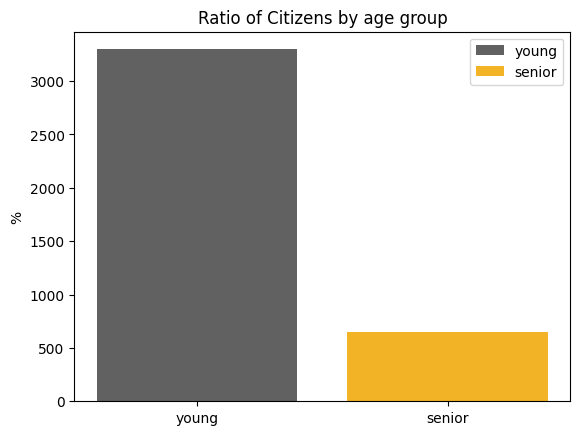

In [82]:
plt.bar(age_labels, [youngs['Count'].count(), seniors['Count'].count()], label=age_labels, color=[hex_color1, hex_color2])
plt.title('Ratio of Citizens by age group')
plt.ylabel('%')
plt.legend()
plt.show()

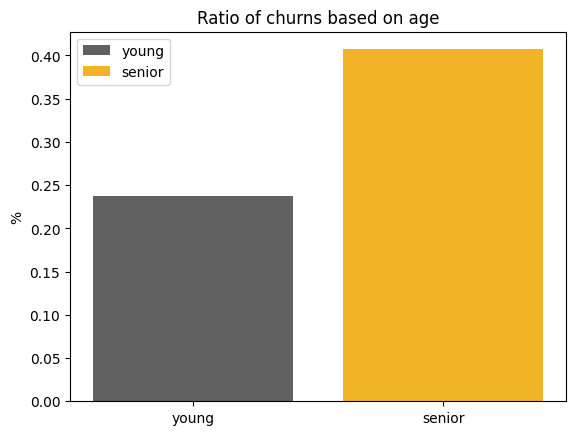

In [83]:
plt.bar(age_labels, [ratio_youngs, ratio_seniors], label=age_labels, color=[hex_color1, hex_color2])
plt.title('Ratio of churns based on age')
plt.ylabel('%')
plt.legend()
plt.show()

In [84]:
reasons = seniors[seniors['Churn Value'] == 1]['Churn Reason']

reasons = pd.Series(reasons)
churn_seniores = pd.Series(churn_seniors)

churn_reasons_seniors = pd.concat([churn_seniors, reasons], axis=1)
churn_reasons_seniors

,Count,Churn Reason
10,1,Product dissatisfaction
24,1,Moved
37,1,Competitor made better offer
40,1,Network reliability
64,1,Lack of self-service on Website
...,...,...
3822,1,Attitude of service provider
3832,1,Competitor offered higher download speeds
3861,1,Competitor had better devices
3881,1,Price too high


In [85]:
# Partner [categorical]
partner_labels = ['partner', 'no-partner']

partner = train_data[train_data["Partner"] == "Yes"]
no_partner = train_data[train_data["Partner"] == "No"]

churn_partner = partner[partner['Churn Value'] == 1]['Count']
churn_no_partner = no_partner[no_partner['Churn Value'] == 1]['Count']

ratio_partners = churn_partner.count() / partner['Count'].count()
ratio_no_partners = churn_no_partner.count() / no_partner['Count'].count()
print(ratio_partners, ratio_no_partners)

0.19672131147540983 0.3278129566488066


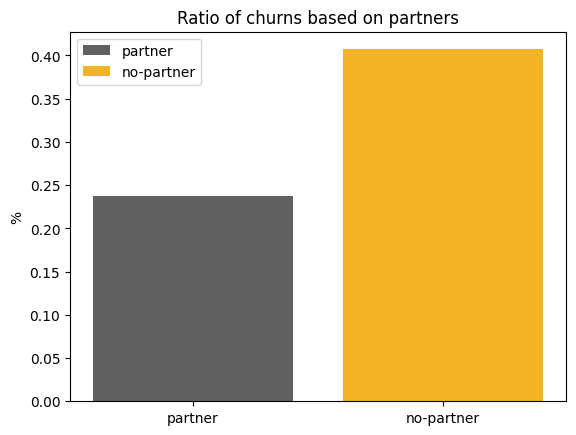

In [86]:
plt.bar(partner_labels, [ratio_youngs, ratio_seniors], label=partner_labels, color=[hex_color1, hex_color2])
plt.title('Ratio of churns based on partners')
plt.ylabel('%')
plt.legend()
plt.show()

In [87]:
# Dependents [categorical]
dependents_labels = ['dependent', 'not-dependent']

dependents = train_data[train_data["Dependents"] == "Yes"]
not_dependents = train_data[train_data["Dependents"] == "No"]

churn_dependent = dependents[dependents['Churn Value'] == 1]['Count']
churn_not_dependent = not_dependents[not_dependents['Churn Value'] == 1]['Count']

ratio_dependents = churn_dependent.count() / dependents['Count'].count()
ratio_no_dependents = churn_not_dependent.count() / not_dependents['Count'].count()
print(ratio_dependents, ratio_no_dependents)

0.06971677559912855 0.3241903502974223


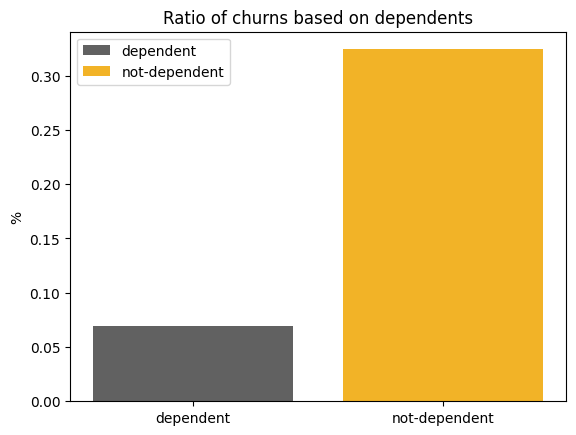

In [88]:
plt.bar(dependents_labels, [ratio_dependents, ratio_no_dependents], label=dependents_labels, color=[hex_color1, hex_color2])
plt.title('Ratio of churns based on dependents')
plt.ylabel('%')
plt.legend()
plt.show()

In [89]:
# Tenure Months [numeric]
churned_tenure = train_data[train_data["Churn Value"] == 1]['Tenure Months']
not_churned_tenure = train_data[train_data["Churn Value"] == 0]['Tenure Months']

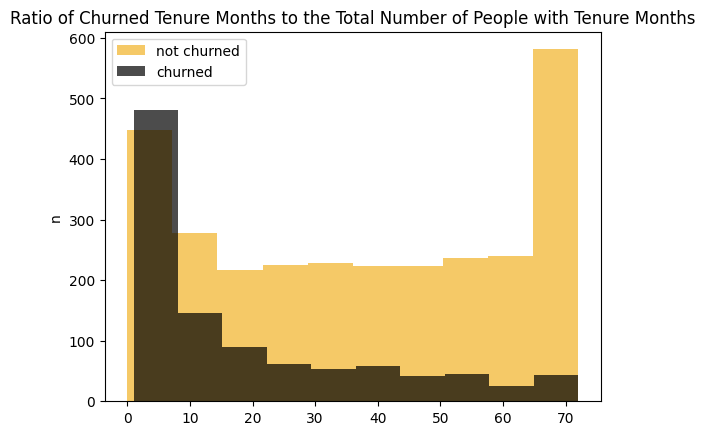

In [90]:
plt.hist(not_churned_tenure, label='not churned', alpha=0.7, color=hex_color2)
plt.hist(churned_tenure, label='churned', alpha=0.7, color=hex_color3)
plt.title('Ratio of Churned Tenure Months to the Total Number of People with Tenure Months')
plt.ylabel('n')
plt.legend()
plt.show()

In [114]:
# PHONE SERVICE
phone_service = train_data[train_data['Churn Value'] == 1]['Phone Service']
phone_service = phone_service[phone_service == 'Yes'].count()
# MULTIPLE LINES
multiple_lines = train_data[train_data['Churn Value'] == 1]['Multiple Lines']
multiple_lines = multiple_lines[multiple_lines == 'Yes'].count()
# INTERNET SERVICE
internet_service = train_data[train_data['Churn Value'] == 1]['Internet Service']
internet_sum = internet_service[internet_service == 'DSL'].count()
internet_sum += internet_service[internet_service == 'Fiber optic'].count()
# ONLINE SECURITY
online_security = train_data[train_data['Churn Value'] == 1]['Online Security']
online_security = online_security[online_security == 'Yes'].count()
# ONLINE BACKUP
online_backup = train_data[train_data['Churn Value'] == 1]['Online Backup']
online_backup = online_backup[online_backup == 'Yes'].count()
# DEVICE PROTECTION
device_protection = train_data[train_data['Churn Value'] == 1]['Device Protection']
device_protection = device_protection[device_protection == 'Yes'].count()
# TECH SUPPORT
tech_support = train_data[train_data['Churn Value'] == 1]['Tech Support']
tech_support = tech_support[tech_support == 'Yes'].count()
# STREAMING TV
streaming_tv = train_data[train_data['Churn Value'] == 1]['Streaming TV']
streaming_tv = streaming_tv[streaming_tv == 'Yes'].count()
# STREAMING MOVIES
streaming_movies = train_data[train_data['Churn Value'] == 1]['Streaming Movies']
streaming_movies = streaming_movies[streaming_movies == 'Yes'].count()

In [119]:
service_names = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
services = [phone_service, multiple_lines, internet_sum, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies]

all_services = []
for service in service_names:
  all_services.append(train_data[service].count())

for i in range(len(all_services)):
  services[i] = services[i] / all_services[i]

for i in range(len(all_services)):
  print(f'{service_names[i]} - {services[i]}')

Phone Service - 0.2426470588235294
Multiple Lines - 0.11815415821501014
Internet Service - 0.24746450304259635
Online Security - 0.044878296146044626
Online Backup - 0.07581135902636917
Device Protection - 0.07733265720081135
Tech Support - 0.044878296146044626
Streaming TV - 0.11561866125760649
Streaming Movies - 0.11460446247464504


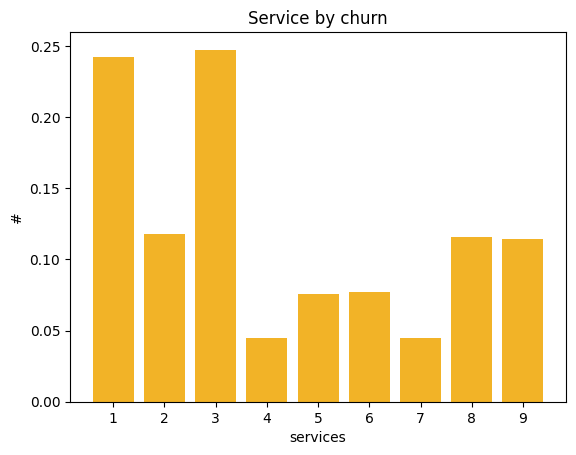

In [117]:
service_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.bar(service_labels, services, color=hex_color2)
plt.title('Service by churn')
plt.ylabel('#')
plt.xlabel('services')
plt.show()

In [93]:
# Contract [categorical]
contracts = train_data['Contract'].unique()
contract_churn = []

for contract in contracts:
  contract_data = train_data[train_data['Contract'] == contract]['Churn Value']
  contract_churn.append(contract_data[contract_data == 1].count())

contract_churn

[924, 89, 32]

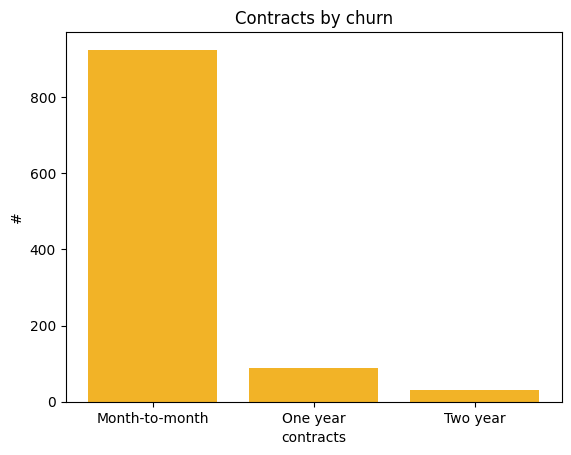

In [94]:
plt.bar(contracts, contract_churn, color=hex_color2)
plt.title('Contracts by churn')
plt.ylabel('#')
plt.xlabel('contracts')
plt.show()

In [121]:
# Payment Method [categorical]
payment_methods = train_data['Payment Method'].unique()
pay_method_churn = []

for pm in payment_methods:
  pay_method_data = train_data[train_data['Payment Method'] == pm]['Churn Value']
  pay_method_churn.append(pay_method_data[pay_method_data == 1].count())

payment_methods

array(['Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Mailed check'], dtype=object)

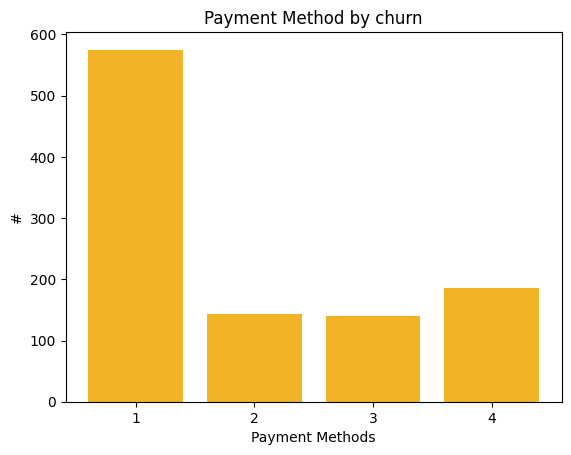

In [96]:
plt.bar(['1', '2', '3', '4'], pay_method_churn, color=hex_color2)
plt.title('Payment Method by churn')
plt.ylabel('#')
plt.xlabel('Payment Methods')
plt.show()

In [97]:
# Monthly Charges [numeric]
month_charge = train_data[train_data["Churn Value"] == 1]['Monthly Charges']
not_churned_tenure = train_data[train_data["Churn Value"] == 0]['Monthly Charges']

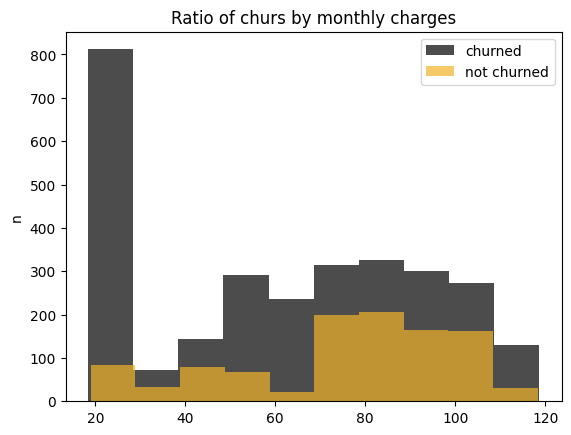

In [122]:
plt.hist(not_churned_tenure, label='churned', alpha=0.7, color=hex_color3)
plt.hist(month_charge, label='not churned', alpha=0.7, color=hex_color2)
plt.title('Ratio of churs by monthly charges')
plt.ylabel('n')
plt.legend()
plt.show()

In [99]:
# CLTV [numeric]
cltv_churn = train_data[train_data["Churn Value"] == 1]['CLTV']
cltv_not_churn = train_data[train_data["Churn Value"] == 0]['CLTV']

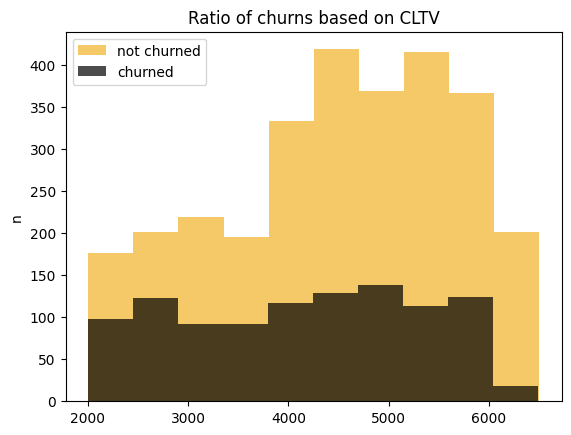

In [100]:
plt.hist(cltv_not_churn, label='not churned', alpha=0.7, color=hex_color2)
plt.hist(cltv_churn, label='churned', alpha=0.7, color=hex_color3)
plt.title('Ratio of churns based on CLTV')
plt.ylabel('n')
plt.legend()
plt.show()

In [106]:
# Payment Method [categorical]
reasons = train_data['Churn Reason'].unique()
reasons_churn = []

for reason in reasons:
  rr = train_data[train_data['Churn Reason'] == reason]['Count'].count()
  reasons_churn.append(rr)

for i in range(reasons.shape[0]):
  print(f'{reasons[i]} - {reasons_churn[i]}')

reasons.shape

nan - 0
Competitor offered more data - 99
Product dissatisfaction - 60
Moved - 35
Attitude of support person - 99
Don't know - 82
Competitor made better offer - 87
Limited range of services - 25
Network reliability - 63
Long distance charges - 21
Attitude of service provider - 79
Lack of self-service on Website - 49
Competitor had better devices - 64
Lack of affordable download/upload speed - 26
Price too high - 50
Poor expertise of phone support - 11
Extra data charges - 38
Competitor offered higher download speeds - 95
Service dissatisfaction - 47
Deceased - 4
Poor expertise of online support - 11


(21,)

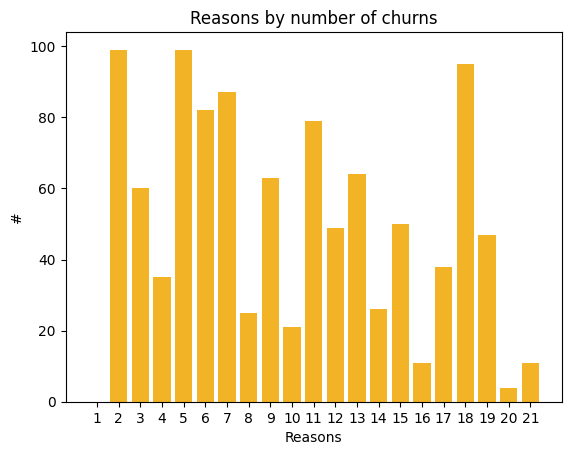

In [108]:
plt.bar(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'], reasons_churn, color=hex_color2)
plt.title('Reasons by number of churns')
plt.ylabel('#')
plt.xlabel('Reasons')
plt.show()

In [101]:
# Если успею то сделаю классификацмю причин

# 🔥 LEGENDARY CODE THAT HITTED 53 ACCURACY 🦅

In [69]:
sample = pd.read_csv("sample_submission.csv")
sample.count()

ID             986
Churn Value    986
dtype: int64

In [70]:
import random

In [71]:
for num in range(6):
  churn_value = []
  id = []
  for i in range(986):
    id.append(i)
    churn_value.append(random.random())

  sample_data = {'ID': id, 'Churn Value': churn_value}

  sample_df = pd.DataFrame(data=sample_data)
  compression_opts = dict(method='zip', archive_name=f'out{num+1}.csv')
  sample_df.to_csv(f'out{num+1}.zip', index=False, compression=compression_opts)